In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import regex as re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer

In [4]:
df18 = pd.read_csv('Data/2018-merged.csv')
df19 = pd.read_csv('Data/2019-merged.csv')
df20 = pd.read_csv('Data/2020-merged.csv')
df21 = pd.read_csv('Data/2021-merged.csv')
df22 = pd.read_csv('Data/2022-merged.csv')

df18['Year'] = 2018
df19['Year'] = 2019
df20['Year'] = 2020
df21['Year'] = 2021
df22['Year'] = 2022

df = pd.concat([df18,df19,df20,df21,df22], ignore_index=True)

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df ,df_test = train_test_split(df,test_size=0.1,random_state=42)

In [ ]:
df['length'] = df['Abstract'].str.len()
df = df[df['length']>15]

In [37]:
len(df),len(df_test)

(1486362, 165152)

In [62]:
stop = stopwords.words('english')
stop.extend(['from', 'subject', 're', 'edu', 'based','base','use' , 'first' , 'second' , 'may' , 'data' , 'memeber', 'display' ,
             'include' , 'includes', 'including','method', 'display' , 'one' , 'unit', 'third', 'end' , 'side' , 'least' , 
             'configured', 'part', 'said' , 'least' , 'comprising', 'body' , 'position' , 'support' , 'user','provided',
             'provide','wherein','data','comprises','system','device','devices','systems','thereof','present',
            'layer','portion','plurality','process','processing','surface','information','region','member'])

In [63]:
def preprocess(title):
    result = title.lower()
    
    result = result.strip(' "\'')
    result = re.sub(r'[^\w\s]', ' ', result)
    result = re.sub(r'\s+', ' ', result)
    words = result.split()
    
    title_2=[item for item in words if item not in stop]
    
    lemmatizer = WordNetLemmatizer()
    fin_title = []
    for word in title_2:
        
        word = str(lemmatizer.lemmatize(word))
        fin_title.append(word)
    
    return list(fin_title)


In [8]:
# perform SVD on the bag of words with the LsiModel to extract 3 topics
lsi = LsiModel(bow, num_topics=3, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=5):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.663*"first" + 0.472*"second" + 0.181*"device" + 0.177*"includes" + 0.161*"one".
Words in 1: -0.382*"first" + 0.358*"data" + 0.349*"one" + 0.314*"device" + -0.295*"second".
Words in 2: -0.481*"data" + 0.370*"layer" + 0.305*"one" + 0.268*"least" + 0.233*"portion".


In [9]:
# perform SVD on the bag of words with the LsiModel to extract 5 topics
lsi = LsiModel(bow, num_topics=5, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=6):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.663*"first" + 0.472*"second" + 0.181*"device" + 0.177*"includes" + 0.161*"one" + 0.127*"data".
Words in 1: -0.382*"first" + 0.359*"data" + 0.349*"one" + 0.313*"device" + -0.295*"second" + 0.216*"least".
Words in 2: -0.482*"data" + 0.364*"layer" + 0.303*"one" + 0.267*"least" + 0.236*"portion" + 0.231*"surface".
Words in 3: 0.760*"device" + -0.436*"data" + -0.309*"one" + -0.210*"least" + 0.099*"information" + 0.092*"control".
Words in 4: -0.683*"layer" + -0.435*"data" + 0.298*"one" + 0.222*"least" + -0.136*"substrate" + 0.114*"signal".


In [10]:
# perform SVD on the bag of words with the LsiModel to extract 10 topics
lsi = LsiModel(bow, num_topics=10, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=6):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.663*"first" + 0.472*"second" + 0.181*"device" + 0.177*"includes" + 0.161*"one" + 0.127*"data".
Words in 1: -0.382*"first" + 0.359*"data" + 0.350*"one" + 0.314*"device" + -0.295*"second" + 0.216*"least".
Words in 2: -0.483*"data" + 0.369*"layer" + 0.306*"one" + 0.268*"least" + 0.232*"portion" + 0.229*"surface".
Words in 3: 0.766*"device" + -0.414*"data" + -0.322*"one" + -0.219*"least" + 0.097*"information" + 0.086*"control".
Words in 4: -0.684*"layer" + -0.457*"data" + 0.279*"one" + 0.209*"least" + -0.135*"substrate" + 0.116*"signal".
Words in 5: -0.396*"one" + 0.362*"portion" + -0.272*"least" + 0.264*"unit" + -0.226*"device" + 0.226*"includes".
Words in 6: 0.449*"portion" + -0.361*"signal" + 0.288*"device" + -0.268*"layer" + 0.255*"data" + -0.231*"unit".
Words in 7: 0.641*"may" + 0.335*"system" + -0.240*"device" + -0.230*"data" + -0.198*"least" + -0.192*"image".
Words in 8: -0.588*"image" + 0.416*"signal" + -0.268*"information" + 0.233*"circuit" + 0.195*"data" + 0.189*"po

##### ALL DATA

In [64]:
final_abstract = df['Abstract'].apply(preprocess)
corpus = final_abstract
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

# perform SVD on the bag of words with the LsiModel to extract 10 topics
lsi = LsiModel(bow, num_topics=10, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=10):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.382*"signal" + 0.269*"image" + 0.232*"control" + 0.190*"light" + 0.174*"circuit" + 0.154*"power" + 0.140*"element" + 0.134*"output" + 0.115*"sensor" + 0.115*"apparatus".
Words in 1: 0.747*"image" + -0.485*"signal" + 0.184*"light" + -0.173*"circuit" + -0.123*"power" + -0.115*"control" + 0.104*"object" + -0.100*"voltage" + -0.089*"output" + 0.056*"lens".
Words in 2: -0.424*"light" + 0.410*"image" + 0.350*"signal" + -0.230*"substrate" + -0.210*"electrode" + -0.207*"element" + -0.163*"structure" + -0.154*"material" + -0.134*"disposed" + -0.123*"semiconductor".
Words in 3: -0.568*"light" + -0.460*"signal" + 0.217*"network" + -0.180*"image" + 0.137*"communication" + 0.117*"vehicle" + -0.115*"optical" + -0.099*"emitting" + 0.097*"memory" + 0.096*"set".
Words in 4: 0.523*"light" + 0.282*"network" + -0.270*"image" + -0.242*"electrode" + -0.196*"substrate" + 0.163*"communication" + -0.154*"signal" + -0.153*"circuit" + -0.151*"structure" + -0.128*"semiconductor".
Words in 5: 0.482*"

In [59]:
# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=20):
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.416*"layer" + 0.271*"portion" + 0.238*"surface" + 0.211*"plurality" + 0.207*"signal" + 0.176*"image" + 0.172*"light" + 0.141*"control" + 0.138*"substrate" + 0.132*"information" + 0.124*"region" + 0.124*"element" + 0.122*"electrode" + 0.112*"circuit" + 0.105*"structure" + 0.093*"material" + 0.093*"power" + 0.092*"disposed" + 0.090*"member" + 0.090*"direction".
Words in 1: -0.609*"layer" + 0.320*"signal" + 0.226*"image" + 0.219*"information" + 0.181*"control" + -0.156*"surface" + -0.129*"substrate" + -0.114*"portion" + -0.112*"electrode" + 0.103*"plurality" + 0.102*"output" + 0.102*"power" + 0.099*"network" + -0.097*"semiconductor" + 0.096*"circuit" + 0.095*"communication" + 0.089*"input" + 0.089*"value" + 0.083*"vehicle" + 0.081*"time".
Words in 2: -0.666*"portion" + 0.482*"layer" + -0.252*"surface" + 0.224*"signal" + -0.195*"member" + -0.103*"direction" + 0.096*"information" + -0.082*"assembly" + -0.079*"housing" + -0.068*"outer" + 0.063*"circuit" + -0.061*"element" + -0.

In [ ]:
# perform SVD on the bag of words with the LsiModel to extract 10 topics
lsi = LsiModel(bow, num_topics=10, id2word=dictionary)

# find the 5 words with the srongest association to the derived topics
for topic_num, words in lsi.print_topics(num_words=6):
    print('Words in {}: {}.'.format(topic_num, words))

In [65]:
# find the scores given between the review and each topic
corpus_lsi = lsi[bow]
score1 = []
score2 = []
score3 = []
score4 = []
score5 = []
score6 = []
score7 = []
score8 = []
score9 = []
score10 = []
for doc in corpus_lsi:
    try:
        score1.append(round(doc[0][1],2))
        score2.append(round(doc[1][1],2))
        score3.append(round(doc[2][1],2))
        score4.append(round(doc[3][1],2))
        score5.append(round(doc[4][1],2))
        score6.append(round(doc[5][1],2))
        score7.append(round(doc[6][1],2))
        score8.append(round(doc[7][1],2))
        score9.append(round(doc[8][1],2))
        score10.append(round(doc[9][1],2))
    except:
        if len(doc) == 0:
            score1.append(-10)
            score2.append(-10)
            score3.append(-10)
            score4.append(-10)
            score5.append(-10)
            score6.append(-10)
            score7.append(-10)
            score8.append(-10)
            score9.append(-10)
            score10.append(-10)
            
        print(doc,'it happened')

# create data frame that shows scores assigned for both topics for each review
df_topic = pd.DataFrame()
df_topic['Abstract'] = df['Abstract']
df_topic['Year'] = df['Year']
df_topic['Topic 0 score'] = score1
df_topic['Topic 1 score'] = score2
df_topic['Topic 2 score'] = score3
df_topic['Topic 3 score'] = score4
df_topic['Topic 4 score'] = score5
df_topic['Topic 5 score'] = score6
df_topic['Topic 6 score'] = score7
df_topic['Topic 7 score'] = score8
df_topic['Topic 8 score'] = score9
df_topic['Topic 9 score'] = score10

df_topic['Topic']= df_topic[['Topic 0 score', 'Topic 1 score','Topic 2 score','Topic 3 score',
                             'Topic 4 score','Topic 5 score','Topic 6 score','Topic 7 score',
                             'Topic 8 score','Topic 9 score']].apply(lambda x: x.argmax(), axis=1)
df_topic['Topic'].value_counts()

[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened
[] it happened


0    942310
6    138971
9    109837
3     77165
1     66785
4     55985
5     35397
8     31196
7     28535
2       181
Name: Topic, dtype: int64

/Users/shreya/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


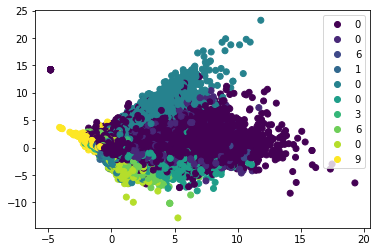

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(df_topic.drop(['Abstract','Year','Topic'],axis=1))
plot = plt.scatter(Xt[:,0], Xt[:,1], c=df_topic['Topic'])
plt.legend(handles=plot.legend_elements()[0], labels=list(df_topic['Topic']))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(12, 10))
sns.catplot(x = "Topic", data = df_topic, kind = "count",hue="Year")
plt.title('Count of Topics')
plt.show()

In [70]:
labels ={}
for i in df_topic['Topic']:
    labels[i] = labels.get(i,0) + 1
labels

{0: 942310,
 6: 138971,
 1: 66785,
 3: 77165,
 9: 109837,
 8: 31196,
 5: 35397,
 4: 55985,
 7: 28535,
 2: 181}

In [ ]:
from sklearn.manifold import TSNE

X = df_topic.iloc[:,2:12].to_numpy().tolist()
X_tsne = TSNE(n_components = 2, learning_rate='auto', init='random').fit_transform(np.array(X))

plt.figure(figsize=(12, 10))
for topics in np.unique(df_topic['Topic']):
    x = X_tsne[(df_topic['Topic'] == topics),0]
    y = X_tsne[(df_topic['Topic'] == topics),1]
    plt.scatter(x, y, label = topics)
plt.xlabel('First t-SNE dimension', fontsize = 12)
plt.ylabel('Second t-SNE dimension', fontsize = 12)
plt.title('Projection of data onto the first two t-SNE dimensions with points colored by topics',
          fontsize = 14)
plt.legend()
plt.show()

In [18]:
df_topic.head()

,Abstract,Year,Topic 0 score,Topic 1 score,Topic 2 score,Topic 3 score,Topic 4 score,Topic 5 score,Topic 6 score,Topic 7 score,Topic 8 score,Topic 9 score,Topic
638558,A transfer and coating apparatus transfers a c...,2019,0.90,-0.91,0.01,0.31,-0.13,0.46,-0.11,-0.11,0.33,0.10,0
1343564,An example apparatus includes an input buffer ...,2021,1.72,-0.20,1.18,-0.54,0.36,1.18,0.14,0.37,-0.95,0.68,0
19916,Provided is a container including a container ...,2018,1.15,-1.29,0.02,0.27,-0.45,0.14,0.49,0.36,0.52,-0.53,0
10902,In accordance with one or more embodiments her...,2018,1.78,0.72,0.56,-0.65,-0.91,0.00,0.99,-0.21,0.18,-0.16,0
957828,"A drive voltage supply circuit, a display pane...",2020,1.05,-0.54,0.21,-0.37,0.81,-0.68,0.46,1.00,-0.49,-0.19,0


In [67]:
df_topic.to_csv('topic-model-lsa-group10-newstops-lemmatized.csv',index=False)